# Decision Tree

Decision Tree is a one of a popular (and simple) machine learning model. It's a supervised learning model that can be used for both classification and regression. The intuition behind the decision tree is simple, yet powerful. It's a tree-like model that makes a decision based on the given features. The decision tree is a white-box model, which means that it's easy to interpret the model's decision.

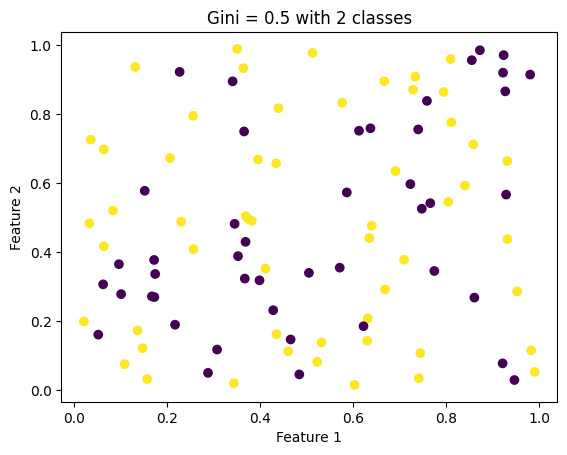

In [ ]:
# Make a sample dataset to illustrate GINI impurity

import numpy as np
import matplotlib.pyplot as plt

# Create a sample data set with 2 features and 2 classes and 100 samples
# The GINI impurity should be = 0.5
X = np.random.rand(100, 2)
y = np.random.randint(0, 2, 100)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Set gini number to the title
plt.title('Gini = 0.5 with 2 classes')

plt.show()

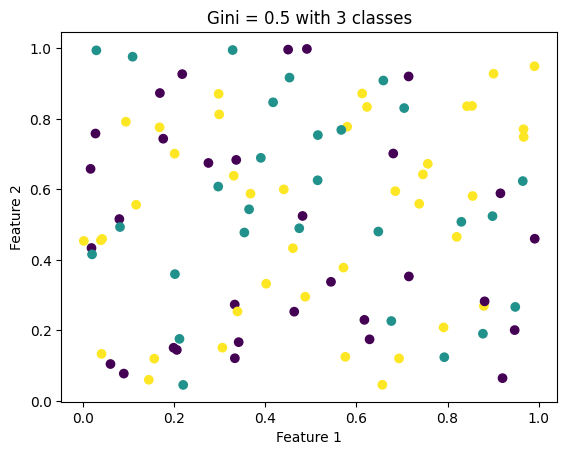

In [ ]:
# Make a sample dataset to illustrate GINI impurity

import numpy as np
import matplotlib.pyplot as plt

# Create a sample data set with 2 features and 3 classes and 100 samples
# The GINI impurity should be = 0.5

X = np.random.rand(100, 2)
y = np.random.randint(0, 3, 100)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Set gini number to the title
plt.title('Gini = 0.5 with 3 classes')

plt.show()

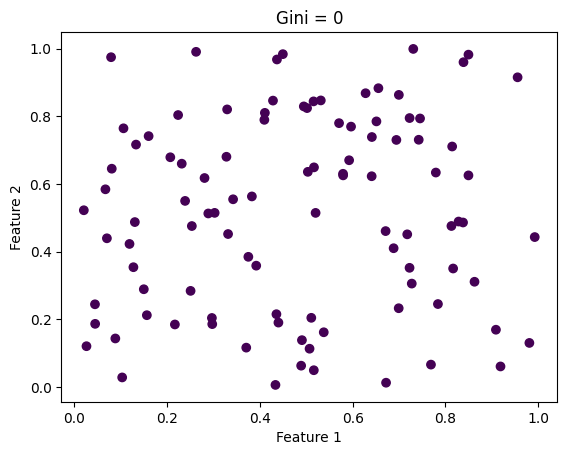

In [ ]:
# Make a sample dataset to illustrate GINI impurity

import numpy as np
import matplotlib.pyplot as plt

# Create a sample data set with 2 features and 2 classes and 100 samples
# The GINI impurity should be = 0

X = np.random.rand(100, 2)
y = np.zeros(100)

# Plot the data
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Set gini number to the title
plt.title('Gini = 0')

plt.show()

## Example

Go to [this link](https://docs.google.com/spreadsheets/d/1ZkSPPlyO5LqT5oebX5pH7T3qyF0xojratBV8mWYKFlM/edit#gid=0) and try to split the data manually

Your goal: decide which feature the dataset should be split by to get better GINI value

### Machine Learning Approach

Now let the machine do it for us:

In [ ]:
!pip install pydotplus

In [ ]:
# load assets/decision-tree-exercise.csv

import pandas as pd
import numpy as np

df = pd.read_csv('assets/decision-tree-exercise.csv')
df.head()

,Ticket Price,Holiday duration,Jakarta PM 2.5,Temperature,Hectic in company?,Holiday to Bali
0,1200000,10,198,35,Y,True
1,641374,4,103,31,Y,False
2,1381146,9,194,39,Y,True
3,1478889,7,169,32,N,False
4,897024,5,189,32,N,False


In [ ]:

df.dtypes

Ticket Price           int64
Holiday duration       int64
Jakarta PM 2.5         int64
Temperature            int64
Hectic in company?    object
Holiday to Bali         bool
dtype: object

In [ ]:
# Build decision tree model using sci-kit learn

from sklearn.tree import DecisionTreeClassifier

columns = ["Ticket Price", "Holiday duration", "Jakarta PM 2.5", "Temperature", "Hectic in company?"]

# convert Hectic in company? (y/n) to numeric
df["Hectic in company?"] = df["Hectic in company?"].map({"Y": 1, "N": 0})

# convert "Holiday to Bali" (TRUE/FALSE) to numeric
df["Holiday to Bali"] = df["Holiday to Bali"].map({True: 1, False: 0})

X = df[columns]
y = df["Holiday to Bali"]

In [ ]:
X

,Ticket Price,Holiday duration,Jakarta PM 2.5,Temperature,Hectic in company?
0,1200000,10,198,35,1
1,641374,4,103,31,1
2,1381146,9,194,39,1
3,1478889,7,169,32,0
4,897024,5,189,32,0
...,...,...,...,...,...
195,537683,10,124,37,1
196,1194739,1,104,33,1
197,1124824,5,161,32,1
198,718404,5,177,37,1


In [ ]:
# Split data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((150, 5), (50, 5), (150,), (50,))

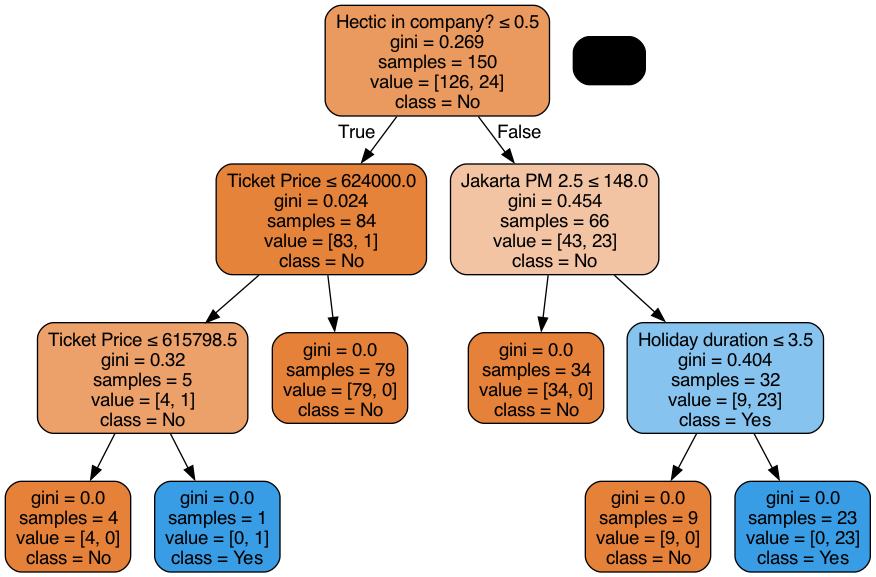

In [ ]:
# Create model
model = DecisionTreeClassifier(max_depth=3)

# Train model
model.fit(X_train, y_train)

# Draw decision tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(model, out_file=None, feature_names=columns, class_names=["No", "Yes"], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [ ]:
# Validate model
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.96

### What is Gini?

Gini is a measure of impurity. The lower the gini, the purer the node.

$$Gini = 1 - \sum_{i=1}^{n} p_i^2$$

![Gini Illustration](https://storage.googleapis.com/lds-media/images/gini-impurity-diagram.width-1200.png)

Source: [Learndatasci.com](https://www.learndatasci.com/glossary/gini-impurity/)

Depends on how we split the data, we can get different purity.

![Pure vs Impure](https://ekamperi.github.io/images/decision_trees/pure_vs_impure_node.png)

Source: [ekamperi.github.io](https://ekamperi.github.io/machine%20learning/2021/04/13/gini-index-vs-entropy-decision-trees.html)

### Alternatives to Gini

There are alternative metrics to using Gini impurity that can help us in building our Decision Tree:

- **Entropy**: This is a measure of disorder or uncertainty. The entropy of a dataset is used for calculating the information gain, which is the reduction in entropy after a dataset is split on an attribute. Constructing a decision tree involves finding the attribute that returns the highest information gain (i.e., the most homogeneous branches).

- **Information Gain**: This is the reduction in entropy or surprise that results from partitioning the data on an attribute. The decision tree will make the split where information gain is maximum, or equivalently, where entropy is minimum.
